In [2]:
# referenced: https://medium.com/ml-research-lab/chapter-4-knowledge-from-the-data-and-data-exploration-analysis-99a734792733
# https://amueller.github.io/aml/01-ml-workflow/01-data-loading.html

In [3]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
from matplotlib import pyplot as plt
import os
sns.set() # Setting seaborn as default style even if use only matplotlib
pd.set_option('display.max_rows', None)

In [4]:
#df_flights = pd.read_csv(r'..\..\csvs\flights_random_sample.csv', sep=',')

with open('../../data/flight_data_500K.pickle','rb') as flight_data_file:
     df_flights = pickle.load(flight_data_file)
df_flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,arr_time,arr_delay,cancelled,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance
0,2019-01-05,AA,AA,AA,188,AA,N969TW,188,12339,IND,...,1400.0,14.0,0.0,0.0,N,156.0,128.0,107.0,1.0,761.0
1,2019-04-07,UA,UA_CODESHARE,UA,4620,AX,N11113,4620,12896,LBB,...,643.0,-3.0,0.0,0.0,N,96.0,97.0,64.0,1.0,456.0
2,2019-10-10,DL,DL_CODESHARE,DL,3783,OO,N693CA,3783,13487,MSP,...,1151.0,111.0,0.0,0.0,N,171.0,174.0,129.0,1.0,852.0
3,2018-10-11,DL,DL,DL,2445,DL,N891AT,2445,11259,DAL,...,2243.0,59.0,0.0,0.0,N,124.0,109.0,89.0,1.0,721.0
4,2018-03-09,WN,WN,WN,6144,WN,N792SW,6144,12953,LGA,...,2005.0,10.0,0.0,0.0,N,180.0,153.0,131.0,1.0,888.0


In [5]:
df_flights.shape

(489978, 32)

### 0 - Train/Test Split

In [6]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_flights, random_state=123)

In [7]:
print(df_train.shape)
print(df_test.shape)

(367483, 32)
(122495, 32)


In [8]:
with open(r'..\..\data\v2\df_train.pickle','wb') as flight_data_file:
     pickle.dump(df_train, flight_data_file)

In [9]:
with open(r'..\..\data\v2\df_test.pickle','wb') as flight_data_file:
     pickle.dump(df_test, flight_data_file)

### 1 - Investigate Null Values

In [10]:
df_train.isnull().sum()

fl_date                0
mkt_unique_carrier     0
branded_code_share     0
mkt_carrier            0
mkt_carrier_fl_num     0
op_unique_carrier      0
tail_num               0
op_carrier_fl_num      0
origin_airport_id      0
origin                 0
origin_city_name       0
dest_airport_id        0
dest                   0
dest_city_name         0
crs_dep_time           0
dep_time               0
dep_delay              0
taxi_out               0
wheels_off             0
wheels_on              0
taxi_in                0
crs_arr_time           0
arr_time               0
arr_delay              0
cancelled              0
diverted               0
dup                    0
crs_elapsed_time       0
actual_elapsed_time    0
air_time               0
flights                0
distance               0
dtype: int64

In [11]:
# percentage of nulls in each column

100*(df_train.isnull().sum()/len(df_train))

fl_date                0.0
mkt_unique_carrier     0.0
branded_code_share     0.0
mkt_carrier            0.0
mkt_carrier_fl_num     0.0
op_unique_carrier      0.0
tail_num               0.0
op_carrier_fl_num      0.0
origin_airport_id      0.0
origin                 0.0
origin_city_name       0.0
dest_airport_id        0.0
dest                   0.0
dest_city_name         0.0
crs_dep_time           0.0
dep_time               0.0
dep_delay              0.0
taxi_out               0.0
wheels_off             0.0
wheels_on              0.0
taxi_in                0.0
crs_arr_time           0.0
arr_time               0.0
arr_delay              0.0
cancelled              0.0
diverted               0.0
dup                    0.0
crs_elapsed_time       0.0
actual_elapsed_time    0.0
air_time               0.0
flights                0.0
distance               0.0
dtype: float64

In [12]:
# drop features with more than 80% missing values

df_train = df_train.dropna(thresh=df_train.shape[0]*0.8,axis=1)

In [13]:
df_train.shape

(367483, 32)

In [14]:
100*(df_train.isnull().sum()/len(df_train))

fl_date                0.0
mkt_unique_carrier     0.0
branded_code_share     0.0
mkt_carrier            0.0
mkt_carrier_fl_num     0.0
op_unique_carrier      0.0
tail_num               0.0
op_carrier_fl_num      0.0
origin_airport_id      0.0
origin                 0.0
origin_city_name       0.0
dest_airport_id        0.0
dest                   0.0
dest_city_name         0.0
crs_dep_time           0.0
dep_time               0.0
dep_delay              0.0
taxi_out               0.0
wheels_off             0.0
wheels_on              0.0
taxi_in                0.0
crs_arr_time           0.0
arr_time               0.0
arr_delay              0.0
cancelled              0.0
diverted               0.0
dup                    0.0
crs_elapsed_time       0.0
actual_elapsed_time    0.0
air_time               0.0
flights                0.0
distance               0.0
dtype: float64

In [15]:
# because remaining features with missing values make up such a small proportino of the data, drop observations with missing values

df_train.dropna(inplace=True)

In [16]:
sum(df_train.isnull().sum())

0

### 2 - Variable Identification

In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367483 entries, 301432 to 254445
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   fl_date              367483 non-null  object 
 1   mkt_unique_carrier   367483 non-null  object 
 2   branded_code_share   367483 non-null  object 
 3   mkt_carrier          367483 non-null  object 
 4   mkt_carrier_fl_num   367483 non-null  int64  
 5   op_unique_carrier    367483 non-null  object 
 6   tail_num             367483 non-null  object 
 7   op_carrier_fl_num    367483 non-null  int64  
 8   origin_airport_id    367483 non-null  int64  
 9   origin               367483 non-null  object 
 10  origin_city_name     367483 non-null  object 
 11  dest_airport_id      367483 non-null  int64  
 12  dest                 367483 non-null  object 
 13  dest_city_name       367483 non-null  object 
 14  crs_dep_time         367483 non-null  int64  
 15  dep_time    

In [18]:
df_train = df_train.reset_index(drop=True)

In [19]:
df_train.dtypes.value_counts()

float64    15
object     11
int64       6
dtype: int64

Categorical Variables:
- Nominal data = categorizes and labels variables
- Ordinal data = categorizes and labels variables + ranks categories in order

Quantitative Variables:
- Interval data = categorizes and labels variables + ranks categories in order + has known, equal intervals
- Ratio data = categorizes and labels variables + ranks categories in order + has known, equal intervals + has a true or meaningful zero (can't have less than 0)

In [20]:
#  0   fl_date              99030 non-null  object  quantitative - interval (datetime) 
#  1   mkt_unique_carrier   99030 non-null  object  categorical - nominal
#  2   branded_code_share   99030 non-null  object  categorical - nominal 
#  3   mkt_carrier          99030 non-null  object  categorical - nominal 
#  4   mkt_carrier_fl_num   99030 non-null  int64   categorical - nominal  
#  5   op_unique_carrier    99030 non-null  object  categorical - nominal 
#  6   tail_num             99030 non-null  object  categorical - nominal  
#  7   op_carrier_fl_num    99030 non-null  int64   categorical - nominal   
#  8   origin_airport_id    99030 non-null  int64   categorical - nominal   
#  9   origin               99030 non-null  object  categorical - nominal  
#  10  origin_city_name     99030 non-null  object  categorical - nominal  
#  11  dest_airport_id      99030 non-null  int64   categorical - nominal   
#  12  dest                 99030 non-null  object  categorical - nominal  
#  13  dest_city_name       99030 non-null  object  categorical - nominal  
#  14  crs_dep_time         99030 non-null  int64   quantitative - interval (datetime)  
#  15  dep_time             99030 non-null  float64 quantitative - interval (datetime)
#  16  dep_delay            99030 non-null  float64 quantitative - ratio     
#  17  taxi_out             99030 non-null  float64 quantitative - ratio
#  18  wheels_off           99030 non-null  float64 quantitative - interval (datetime) 
#  19  wheels_on            99030 non-null  float64 quantitative - interval (datetime)
#  20  taxi_in              99030 non-null  float64 quantitative - ratio
#  21  crs_arr_time         99030 non-null  int64   quantitative - interval (datetime)     
#  22  arr_time             99030 non-null  float64 quantitative - interval (datetime)   
#  23  arr_delay            99030 non-null  float64 quantitative - ratio 
#  24  cancelled            99030 non-null  int64   categorical - nominal (boolean)     
#  25  diverted             99030 non-null  int64   categorical - nominal (boolean)     
#  26  dup                  99030 non-null  object  categorical - nominal   
#  27  crs_elapsed_time     99030 non-null  int64   quantitative - ratio (scheduled elapsed time of flight, in minutes)     
#  28  actual_elapsed_time  99030 non-null  float64 quantitative - ratio (actual elapsed time of flight, in minutes)
#  29  air_time             99030 non-null  float64 quantitative - ratio 
#  30  flights              99030 non-null  int64   quantitative - ratio     
#  31  distance             99030 non-null  int64   quantitative - ratio 

In [21]:
# fix datatypes

df_train['fl_date'] = pd.to_datetime(df_train['fl_date'])

df_train['crs_dep_time'] = df_train['crs_dep_time'].astype(int)
df_train['crs_dep_time'] = pd.to_datetime(df_train['crs_dep_time'], format = '%H%M', errors = 'coerce')

df_train['dep_time'] = df_train['dep_time'].astype(int)
df_train['dep_time'] = pd.to_datetime(df_train['dep_time'], format = '%H%M', errors = 'coerce')

df_train['crs_arr_time'] = df_train['crs_arr_time'].astype(int)
df_train['crs_arr_time'] = pd.to_datetime(df_train['crs_arr_time'], format = '%H%M', errors = 'coerce')

df_train['arr_time'] = df_train['arr_time'].astype(int)
df_train['arr_time'] = pd.to_datetime(df_train['arr_time'], format = '%H%M', errors = 'coerce')

df_train['wheels_off'] = df_train['wheels_off'].astype(int)
df_train['wheels_off'] = pd.to_datetime(df_train['wheels_off'], format = '%H%M', errors = 'coerce')

df_train['wheels_on'] = df_train['wheels_on'].astype(int)
df_train['wheels_on'] = pd.to_datetime(df_train['wheels_on'], format = '%H%M', errors = 'coerce')

df_train['mkt_carrier_fl_num'] = df_train['mkt_carrier_fl_num'].astype(str)
df_train['op_carrier_fl_num'] = df_train['op_carrier_fl_num'].astype(str)
df_train['origin_airport_id'] = df_train['origin_airport_id'].astype(str)
df_train['dest_airport_id'] = df_train['dest_airport_id'].astype(str)


In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367483 entries, 0 to 367482
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   fl_date              367483 non-null  datetime64[ns]
 1   mkt_unique_carrier   367483 non-null  object        
 2   branded_code_share   367483 non-null  object        
 3   mkt_carrier          367483 non-null  object        
 4   mkt_carrier_fl_num   367483 non-null  object        
 5   op_unique_carrier    367483 non-null  object        
 6   tail_num             367483 non-null  object        
 7   op_carrier_fl_num    367483 non-null  object        
 8   origin_airport_id    367483 non-null  object        
 9   origin               367483 non-null  object        
 10  origin_city_name     367483 non-null  object        
 11  dest_airport_id      367483 non-null  object        
 12  dest                 367483 non-null  object        
 13  dest_city_name

In [23]:
# create subset of flights dataframe with quantitative ratio data only

quant_ratio_feats = df_train.dtypes[(df_train.dtypes == 'float64') | (df_train.dtypes == 'int64')].index.tolist()
quant_ratio_df = df_train[quant_ratio_feats]
quant_ratio_df.drop(columns=['cancelled','diverted'],inplace=True)

/tmp/ipykernel_34761/152665121.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quant_ratio_df.drop(columns=['cancelled','diverted'],inplace=True)


In [24]:
quant_ratio_df.head()

,dep_delay,taxi_out,taxi_in,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance
0,-12.0,13.0,5.0,-34.0,73.0,51.0,33.0,1.0,156.0
1,-2.0,13.0,17.0,0.0,181.0,183.0,153.0,1.0,1013.0
2,-3.0,17.0,5.0,-14.0,95.0,84.0,62.0,1.0,432.0
3,9.0,27.0,5.0,10.0,100.0,101.0,69.0,1.0,414.0
4,24.0,22.0,6.0,19.0,125.0,120.0,92.0,1.0,575.0


In [25]:
# create subset of flights dataframe with quantitative interval data only

quant_interval_feats = df_train.dtypes[(df_train.dtypes == 'datetime64[ns]') | (df_train.dtypes == 'timedelta64[ns]')].index.tolist()
quant_interval_df = df_train[quant_interval_feats]

In [26]:
# create subset of flights dataframe with all quantitative data

numeric_df = pd.concat([quant_ratio_df, quant_interval_df], axis=1)

In [27]:
# create # create subset of flights dataframe with all categorical data

cat_nom_feats = df_train.drop(columns=list(numeric_df.columns))
cat_nom_feats.head()

,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,cancelled,diverted,dup
0,UA,UA_CODESHARE,UA,5510,OO,N142SY,5510,12892,LAX,"Los Angeles, CA",14698,SBP,"San Luis Obispo, CA",0.0,0.0,N
1,AA,AA,AA,2570,AA,N342AN,2570,13303,MIA,"Miami, FL",14100,PHL,"Philadelphia, PA",0.0,0.0,N
2,WN,WN,WN,623,WN,N8643A,623,10397,ATL,"Atlanta, GA",12339,IND,"Indianapolis, IN",0.0,0.0,N
3,WN,WN,WN,1902,WN,N760SW,1902,14771,SFO,"San Francisco, CA",12889,LAS,"Las Vegas, NV",0.0,0.0,N
4,AA,AA,AA,1172,AA,N922AN,1172,11057,CLT,"Charlotte, NC",15016,STL,"St. Louis, MO",0.0,0.0,N


### 3 - Univariate Analysis

##### Quantitative Variables

<AxesSubplot: >

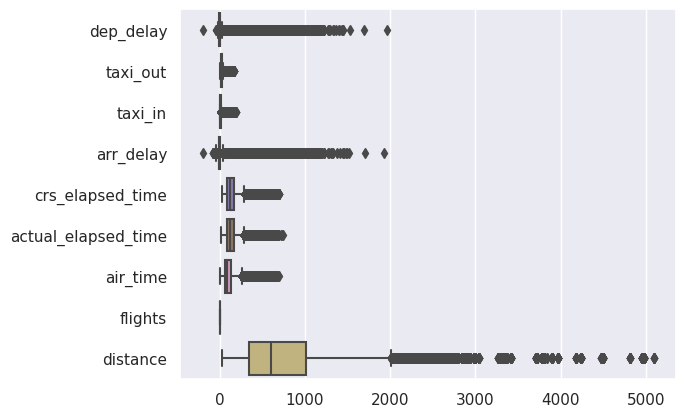

In [28]:
sns.boxplot(data=numeric_df, orient='h')

For continuous variables: We can build histograms and boxplots for each continuous variable independently. These figures give us an understanding about the variables’ central tendencies and spread.

In [29]:
quant_ratio_df.describe()

,dep_delay,taxi_out,taxi_in,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance
count,367483.000000,367483.000000,367483.000000,367483.000000,367483.000000,367483.000000,367483.00000,367483.0,367483.000000
mean,10.501572,17.566723,7.685907,5.553549,138.358305,133.411649,108.15902,1.0,772.232122
std,47.820220,10.070973,6.178998,50.046604,71.785869,71.649893,69.72276,0.0,587.638457
min,-199.000000,0.000000,0.000000,-194.000000,20.000000,17.000000,8.00000,1.0,31.000000
25%,-6.000000,11.000000,4.000000,-15.000000,87.000000,82.000000,58.00000,1.0,342.500000
50%,-2.000000,15.000000,6.000000,-6.000000,120.000000,115.000000,89.00000,1.0,606.000000
75%,7.000000,21.000000,9.000000,8.000000,168.000000,163.000000,137.00000,1.0,1009.000000
max,1959.000000,172.000000,192.000000,1928.000000,695.000000,737.000000,696.00000,1.0,5095.000000


In [30]:
# taxi_out and taxi_in minimum values of 0 are likely null values, since taxi time cannot actually be zero

In [31]:
df_train[df_train['taxi_in']==0]

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,arr_time,arr_delay,cancelled,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance
10100,2019-03-26,HA,HA_CODESHARE,HA,648,EM,N801HC,648,12173,HNL,...,1900-01-01 13:01:00,-10.0,0.0,0.0,N,41.0,36.0,22.0,1.0,84.0
17754,2019-09-22,HA,HA_CODESHARE,HA,648,EM,N801HC,648,12173,HNL,...,1900-01-01 12:40:00,-19.0,0.0,0.0,N,38.0,35.0,25.0,1.0,84.0
19535,2019-12-19,HA,HA_CODESHARE,HA,672,EM,N805HC,672,12173,HNL,...,1900-01-01 20:24:00,132.0,0.0,0.0,N,31.0,43.0,33.0,1.0,54.0
22298,2019-02-22,HA,HA_CODESHARE,HA,602,EM,N801HC,602,12173,HNL,...,1900-01-01 07:13:00,-12.0,0.0,0.0,N,30.0,25.0,20.0,1.0,54.0
22605,2019-10-18,HA,HA_CODESHARE,HA,648,EM,N801HC,648,12173,HNL,...,1900-01-01 12:59:00,0.0,0.0,0.0,N,38.0,40.0,31.0,1.0,84.0
66848,2019-12-15,HA,HA_CODESHARE,HA,654,EM,N805HC,654,12173,HNL,...,1900-01-01 13:46:00,-14.0,0.0,0.0,N,35.0,28.0,19.0,1.0,72.0
115229,2018-12-09,HA,HA_CODESHARE,HA,634,EM,N806HC,634,12173,HNL,...,1900-01-01 11:30:00,-5.0,0.0,0.0,N,34.0,34.0,21.0,1.0,72.0
119757,2019-01-19,HA,HA_CODESHARE,HA,672,EM,N805HC,672,12173,HNL,...,1900-01-01 17:40:00,-12.0,0.0,0.0,N,30.0,27.0,19.0,1.0,54.0
154385,2019-06-29,HA,HA_CODESHARE,HA,684,EM,N806HC,684,12173,HNL,...,1900-01-01 19:08:00,-12.0,0.0,0.0,N,34.0,27.0,19.0,1.0,72.0
170947,2019-11-13,HA,HA_CODESHARE,HA,644,EM,N801HC,644,12173,HNL,...,1900-01-01 11:25:00,-12.0,0.0,0.0,N,35.0,33.0,25.0,1.0,72.0


In [32]:
df_train[df_train['taxi_out']==0]

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,arr_time,arr_delay,cancelled,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance
99364,2019-05-25,HA,HA_CODESHARE,HA,639,EM,N804HC,639,12492,JHM,...,1900-01-01 11:06:00,-11.0,0.0,0.0,N,36.0,35.0,31.0,1.0,84.0
208604,2019-09-14,HA,HA_CODESHARE,HA,673,EM,N801HC,673,13347,MKK,...,1900-01-01 19:03:00,-9.0,0.0,0.0,N,29.0,31.0,28.0,1.0,54.0
303231,2019-04-21,HA,HA_CODESHARE,HA,649,EM,N801HC,649,12492,JHM,...,1900-01-01 14:06:00,-5.0,0.0,0.0,N,36.0,31.0,28.0,1.0,84.0
365275,2019-11-10,HA,HA_CODESHARE,HA,679,EM,N805HC,679,12492,JHM,...,1900-01-01 18:09:00,-6.0,0.0,0.0,N,35.0,33.0,24.0,1.0,84.0


In [33]:
# very few nulls - so just drop 

In [34]:
df_train = df_train.replace({"taxi_out" : {0: np.nan},"taxi_in" : {0: np.nan}})

In [35]:
df_train.isnull().sum()

fl_date                   0
mkt_unique_carrier        0
branded_code_share        0
mkt_carrier               0
mkt_carrier_fl_num        0
op_unique_carrier         0
tail_num                  0
op_carrier_fl_num         0
origin_airport_id         0
origin                    0
origin_city_name          0
dest_airport_id           0
dest                      0
dest_city_name            0
crs_dep_time             64
dep_time                315
dep_delay                 0
taxi_out                  4
wheels_off              535
wheels_on              1516
taxi_in                  20
crs_arr_time           1097
arr_time               1788
arr_delay                 0
cancelled                 0
diverted                  0
dup                       0
crs_elapsed_time          0
actual_elapsed_time       0
air_time                  0
flights                   0
distance                  0
dtype: int64

In [36]:
df_train.dropna(inplace=True)
df_train = df_train.reset_index(drop=True)

In [37]:
def uni_analyis_continuous(df, feature, feature_title):
    
    import matplotlib.pyplot as plt
    import matplotlib.transforms as mtrans

    fig, axes = plt.subplots(1,2, sharex=False, figsize=(10,5))
    fig.suptitle(f'Univariate Analysis - {feature_title}')

    sns.boxplot(ax=axes[0], data=df[feature])
    axes[0].set_title(f'{feature_title} Boxplot')
    sns.histplot(ax=axes[1], data=df[feature])
    axes[1].set_title(f'{feature_title} Histogram')

    Minimum = min(df[feature])
    Median = df[feature].median()
    Mean = df[feature].mean()
    Maximum = max(df[feature])
    
    trans = mtrans.blended_transform_factory(fig.transFigure, mtrans.IdentityTransform())

    txt = fig.text(0.5,10, f'Minimum : {Minimum}, Median : {Median}, Mean : {Mean}, Maximum : {Maximum}', ha='center', va='center_baseline')
    txt.set_transform(trans)

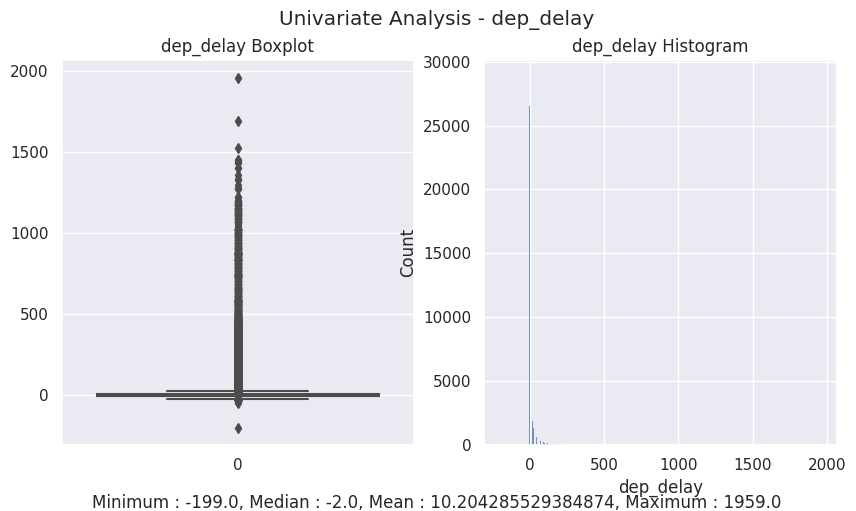

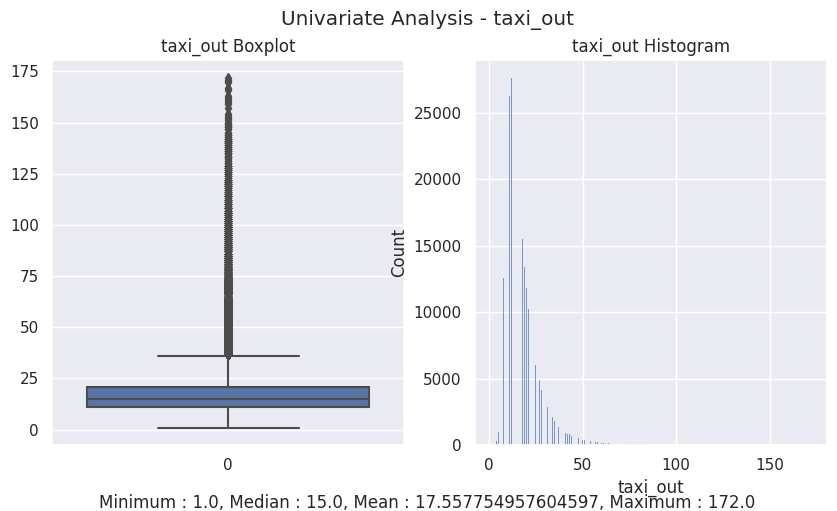

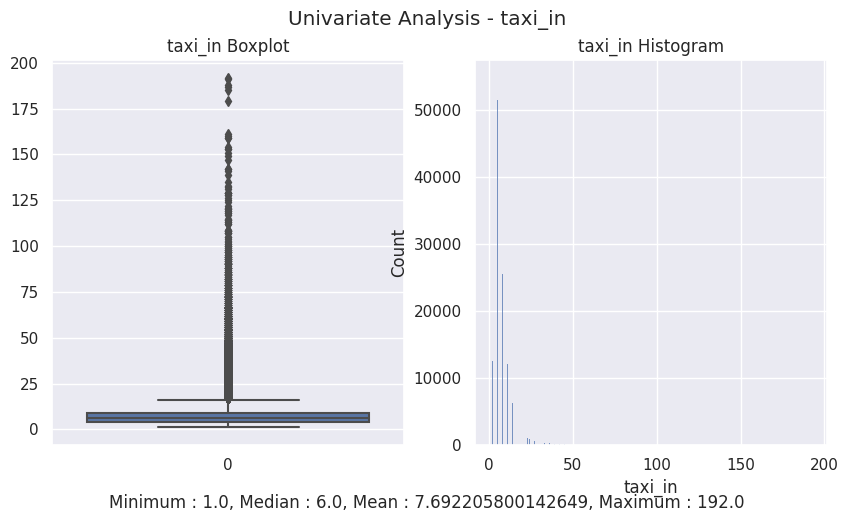

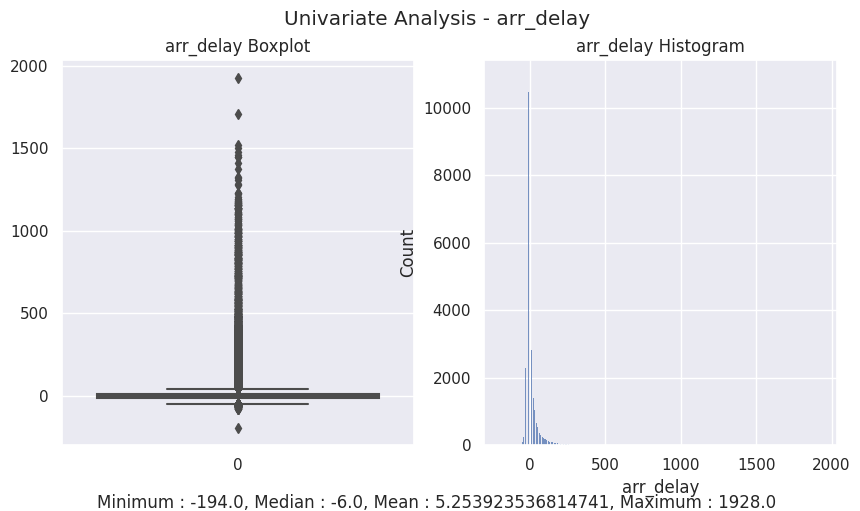

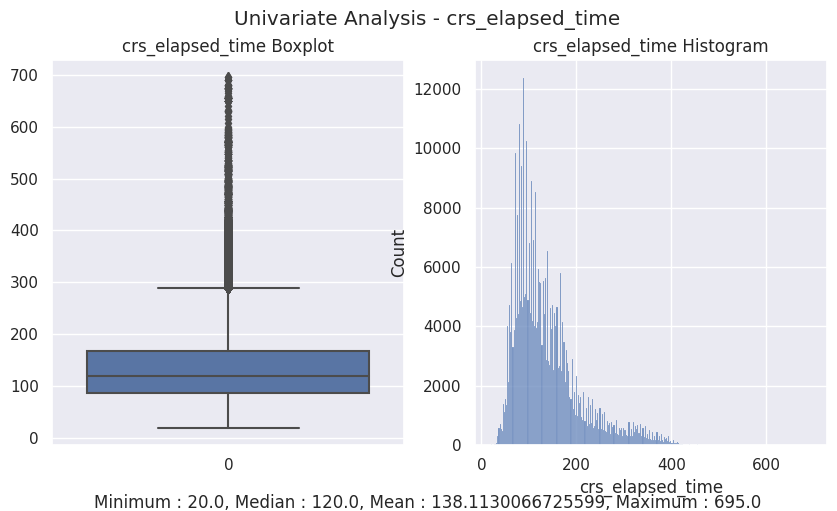

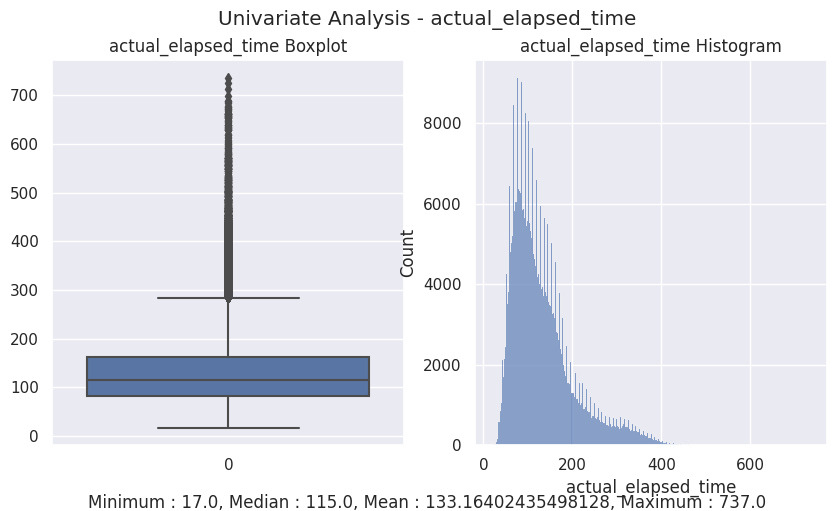

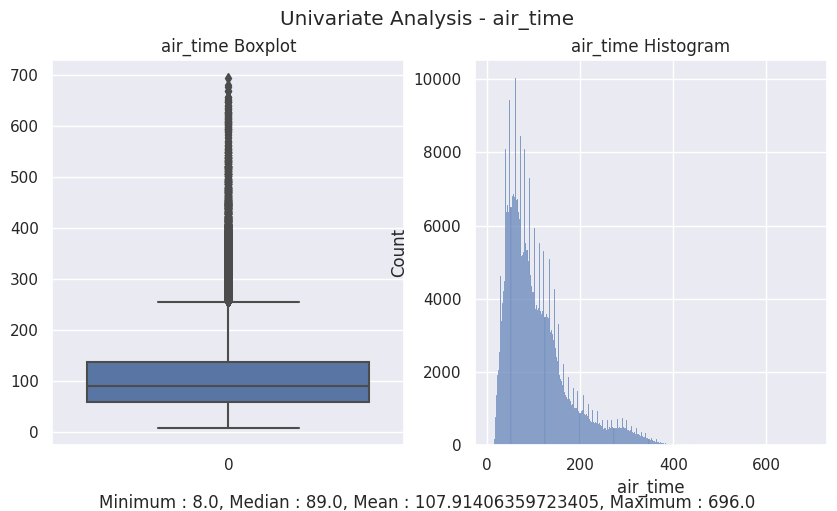

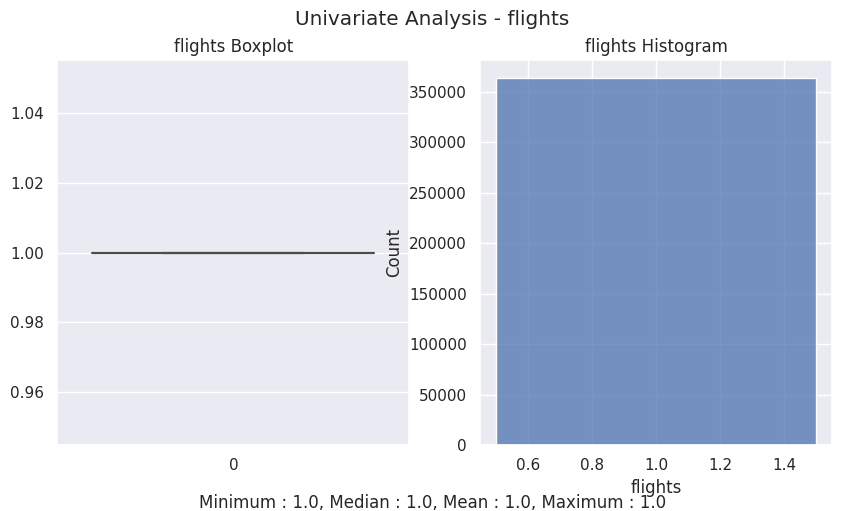

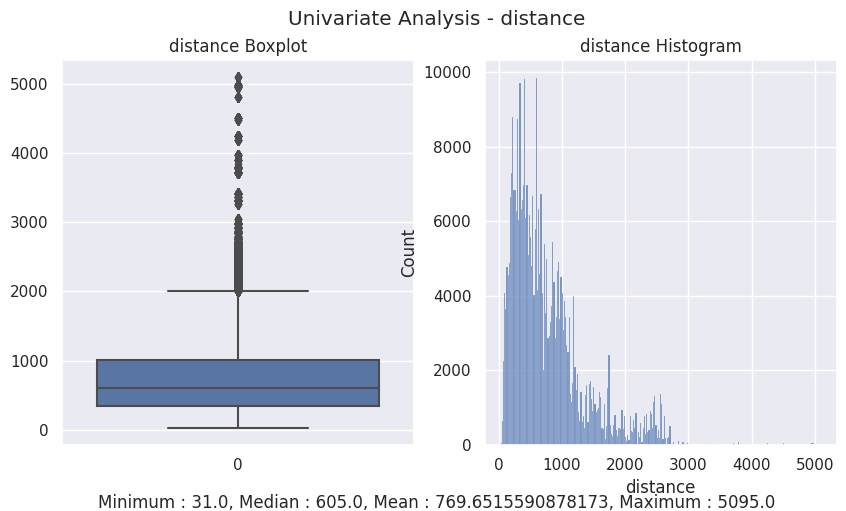

In [38]:
for feat in quant_ratio_df:
    uni_analyis_continuous(df_train, feature=feat, feature_title=feat)

##### Check for Outliers

In [39]:
# check if the outliers seem like mistakes, or if they could be possible. If mistakes, then drop, otherwise keep.

In [40]:
quant_ratio_df.columns

Index(['dep_delay', 'taxi_out', 'taxi_in', 'arr_delay', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance'],
      dtype='object')

In [41]:
def detect_outliers(data):
    from scipy import stats
    import numpy as np

    for feature in data.columns:
        #Finding Z Score on Column
        stats.zscore(data[feature])

        # Turning Absolute
        np.abs(stats.zscore(data[feature]))

        # view the outliers
        outliers = data[feature][(np.abs(stats.zscore(data[feature])) > 3)]

        print(f'Most extreme outlier for {feature} is {outliers.max()}')

In [42]:
detect_outliers(quant_ratio_df)

Most extreme outlier for dep_delay is 1959.0
Most extreme outlier for taxi_out is 172.0
Most extreme outlier for taxi_in is 192.0
Most extreme outlier for arr_delay is 1928.0
Most extreme outlier for crs_elapsed_time is 695.0
Most extreme outlier for actual_elapsed_time is 737.0
Most extreme outlier for air_time is 696.0
Most extreme outlier for flights is nan
Most extreme outlier for distance is 5095.0


In [43]:
# max outliers don't seem impossible, so keep

##### Categorical Variables

For categorical variables: Create a count plot visualization that shows the frequencies in each category.

In [44]:
def uni_analyis_categorical(df, feature):
    
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import matplotlib.transforms as mtrans

    fig, ax = plt.subplots(figsize=(10,5))
    sns.countplot(data = df, y = feature, order = df[feature].value_counts().index, orient='h', palette = 'magma')
    plt.title(f'{feature} frequency')

    cat_count = df[feature].nunique()

    trans = mtrans.blended_transform_factory(fig.transFigure, mtrans.IdentityTransform())

    txt = fig.text(0, 10, f'Number of categories : {cat_count}', ha='center')
    txt.set_transform(trans)

In [45]:
cat_nom_feats.columns

Index(['mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'cancelled', 'diverted',
       'dup'],
      dtype='object')

In [46]:
for cat in cat_nom_feats.columns:
    print(f'{cat} unique values: {df_flights[cat].nunique()}')

mkt_unique_carrier unique values: 11
branded_code_share unique values: 16
mkt_carrier unique values: 11
mkt_carrier_fl_num unique values: 7013
op_unique_carrier unique values: 28
tail_num unique values: 6402
op_carrier_fl_num unique values: 7018
origin_airport_id unique values: 375
origin unique values: 375
origin_city_name unique values: 367
dest_airport_id unique values: 374
dest unique values: 374
dest_city_name unique values: 366
cancelled unique values: 1
diverted unique values: 1
dup unique values: 1


In [47]:
df_flights[['origin_airport_id',
'origin',
'origin_city_name',
'dest_airport_id',
'dest',
'dest_city_name']].head()

,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name
0,12339,IND,"Indianapolis, IN",11298,DFW,"Dallas/Fort Worth, TX"
1,12896,LBB,"Lubbock, TX",11292,DEN,"Denver, CO"
2,13487,MSP,"Minneapolis, MN",11298,DFW,"Dallas/Fort Worth, TX"
3,11259,DAL,"Dallas, TX",10397,ATL,"Atlanta, GA"
4,12953,LGA,"New York, NY",15016,STL,"St. Louis, MO"


In [48]:
df_flights[['mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier']].head()

,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier
0,AA,AA,AA,188,AA
1,UA,UA_CODESHARE,UA,4620,AX
2,DL,DL_CODESHARE,DL,3783,OO
3,DL,DL,DL,2445,DL
4,WN,WN,WN,6144,WN


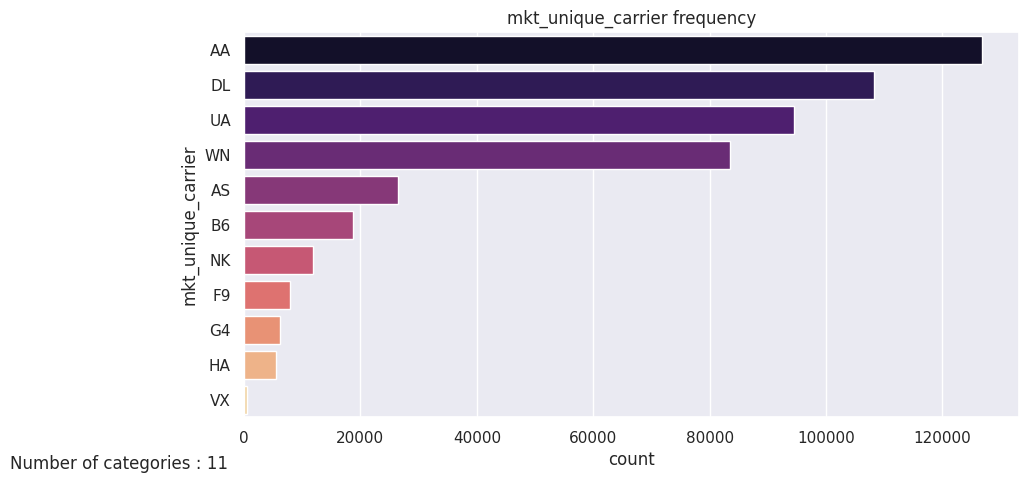

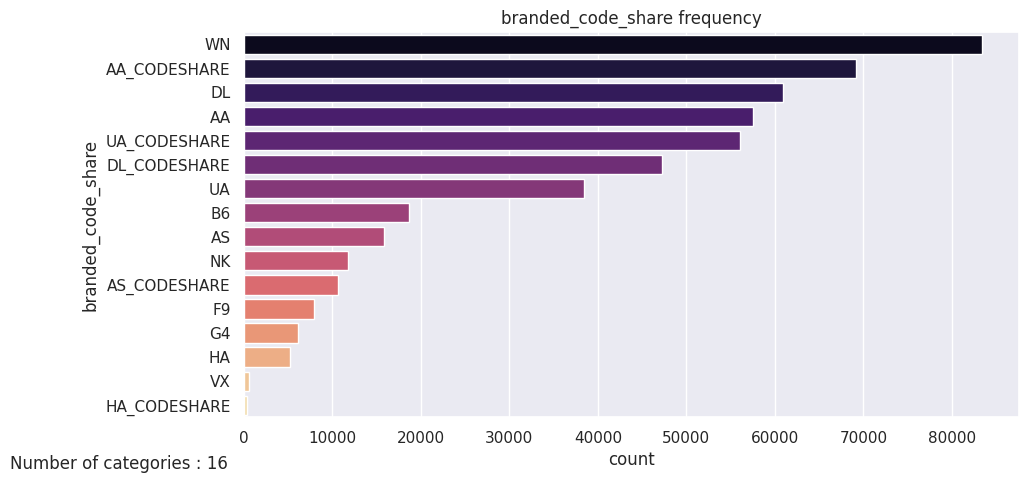

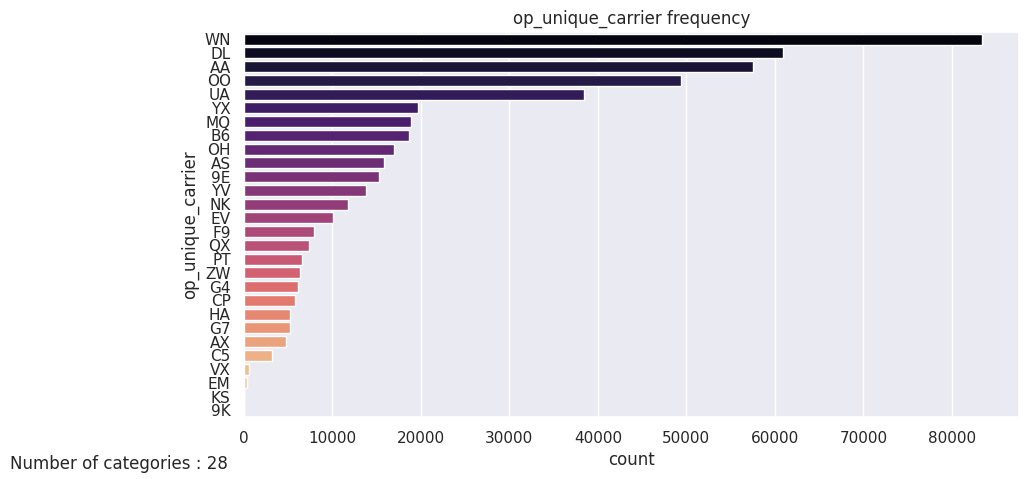

In [49]:
for feat in ['mkt_unique_carrier', 'branded_code_share', 'op_unique_carrier']:
    uni_analyis_categorical(df_flights, feature=feat)

##### Explore the Target Variable

In [50]:
# descriptive statistics

df_train['arr_delay'].describe()

count    363129.000000
mean          5.253924
std          49.635091
min        -194.000000
25%         -15.000000
50%          -6.000000
75%           8.000000
max        1928.000000
Name: arr_delay, dtype: float64

<AxesSubplot: xlabel='arr_delay', ylabel='Count'>

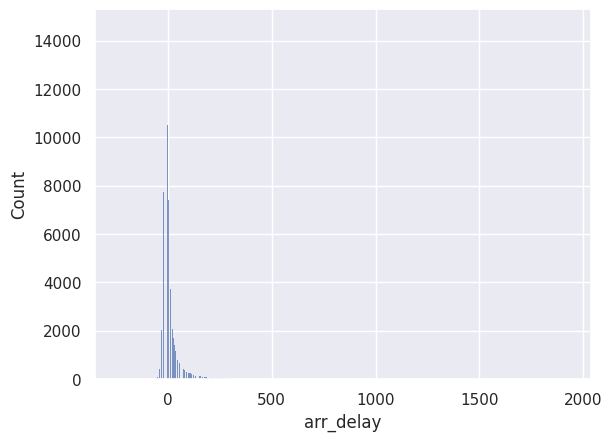

In [51]:
# histogram

sns.histplot(df_flights['arr_delay'])

### 4 - Bi-Variate Analysis

In [52]:
quant_ratio_df.columns

Index(['dep_delay', 'taxi_out', 'taxi_in', 'arr_delay', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance'],
      dtype='object')

sns.pairplot(quant_ratio_df.drop(columns='flights'), kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

corrmat = quant_ratio_df.drop(columns='flights').corr()
plt.figure(figsize=(10,10))
g = sns.heatmap(corrmat,annot=True,cmap="RdYlGn_r")

In [53]:
df_train.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,arr_time,arr_delay,cancelled,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance
0,2019-04-20,UA,UA_CODESHARE,UA,5510,OO,N142SY,5510,12892,LAX,...,1900-01-01 23:14:00,-34.0,0.0,0.0,N,73.0,51.0,33.0,1.0,156.0
1,2019-07-15,AA,AA,AA,2570,AA,N342AN,2570,13303,MIA,...,1900-01-01 16:36:00,0.0,0.0,0.0,N,181.0,183.0,153.0,1.0,1013.0
2,2018-02-22,WN,WN,WN,623,WN,N8643A,623,10397,ATL,...,1900-01-01 23:06:00,-14.0,0.0,0.0,N,95.0,84.0,62.0,1.0,432.0
3,2018-07-20,WN,WN,WN,1902,WN,N760SW,1902,14771,SFO,...,1900-01-01 14:55:00,10.0,0.0,0.0,N,100.0,101.0,69.0,1.0,414.0
4,2019-04-12,AA,AA,AA,1172,AA,N922AN,1172,11057,CLT,...,1900-01-01 19:39:00,19.0,0.0,0.0,N,125.0,120.0,92.0,1.0,575.0


### 5 - Save Cleaned Training Set

In [68]:
with open('df_train_step1output.pickle','wb') as flight_data_file:
     pickle.dump(df_train, flight_data_file)

### 6 - Clean and Save Test Set (same steps as performed on Training Set)

In [55]:
with open(r'..\..\data\v2\df_test.pickle','rb') as flight_data_file:
     df_test = pickle.load(flight_data_file)

In [56]:
df_test.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,arr_time,arr_delay,cancelled,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance
246861,2019-10-26,G4,G4,G4,778,G4,320NV,778,14112,PIE,...,1542.0,-26.0,0.0,0.0,N,161.0,148.0,131.0,1.0,1040.0
399395,2019-03-10,AA,AA,AA,2030,AA,N826AW,2030,11278,DCA,...,1342.0,7.0,0.0,0.0,N,95.0,108.0,59.0,1.0,331.0
339669,2018-12-11,WN,WN,WN,1480,WN,N7876A,1480,14057,PDX,...,1446.0,-4.0,0.0,0.0,N,125.0,124.0,105.0,1.0,817.0
257786,2019-12-22,DL,DL,DL,2932,DL,N707TW,2932,12892,LAX,...,654.0,11.0,0.0,0.0,N,328.0,310.0,271.0,1.0,2611.0
379951,2019-07-15,DL,DL,DL,2762,DL,N314DN,2762,12889,LAS,...,1943.0,-2.0,0.0,0.0,N,82.0,73.0,54.0,1.0,368.0


In [57]:
# drop features with more than 80% missing values

df_test = df_test.dropna(thresh=df_test.shape[0]*0.8,axis=1)

In [58]:
# drop rows with null values

df_test.dropna(inplace=True)

In [59]:
# drop rows with null taxi values

df_test = df_test.replace({"taxi_out" : {0: np.nan},"taxi_in" : {0: np.nan}})

In [60]:
df_test = df_test.reset_index(drop=True)

In [61]:
# fix datatypes

df_test['fl_date'] = pd.to_datetime(df_test['fl_date'])

df_test['crs_dep_time'] = df_test['crs_dep_time'].astype(int)
df_test['crs_dep_time'] = pd.to_datetime(df_test['crs_dep_time'], format = '%H%M', errors = 'coerce')

df_test['dep_time'] = df_test['dep_time'].astype(int)
df_test['dep_time'] = pd.to_datetime(df_test['dep_time'], format = '%H%M', errors = 'coerce')

df_test['crs_arr_time'] = df_test['crs_arr_time'].astype(int)
df_test['crs_arr_time'] = pd.to_datetime(df_test['crs_arr_time'], format = '%H%M', errors = 'coerce')

df_test['arr_time'] = df_test['arr_time'].astype(int)
df_test['arr_time'] = pd.to_datetime(df_test['arr_time'], format = '%H%M', errors = 'coerce')

df_test['wheels_off'] = df_test['wheels_off'].astype(int)
df_test['wheels_off'] = pd.to_datetime(df_test['wheels_off'], format = '%H%M', errors = 'coerce')

df_test['wheels_on'] = df_test['wheels_on'].astype(int)
df_test['wheels_on'] = pd.to_datetime(df_test['wheels_on'], format = '%H%M', errors = 'coerce')

df_test['mkt_carrier_fl_num'] = df_test['mkt_carrier_fl_num'].astype(str)
df_test['op_carrier_fl_num'] = df_test['op_carrier_fl_num'].astype(str)
df_test['origin_airport_id'] = df_test['origin_airport_id'].astype(str)
df_test['dest_airport_id'] = df_test['dest_airport_id'].astype(str)

In [62]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122495 entries, 0 to 122494
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   fl_date              122495 non-null  datetime64[ns]
 1   mkt_unique_carrier   122495 non-null  object        
 2   branded_code_share   122495 non-null  object        
 3   mkt_carrier          122495 non-null  object        
 4   mkt_carrier_fl_num   122495 non-null  object        
 5   op_unique_carrier    122495 non-null  object        
 6   tail_num             122495 non-null  object        
 7   op_carrier_fl_num    122495 non-null  object        
 8   origin_airport_id    122495 non-null  object        
 9   origin               122495 non-null  object        
 10  origin_city_name     122495 non-null  object        
 11  dest_airport_id      122495 non-null  object        
 12  dest                 122495 non-null  object        
 13  dest_city_name

In [63]:
# drop datetime values that didn't convert

df_test.dropna(inplace=True)
df_test = df_test.reset_index(drop=True)

In [64]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121031 entries, 0 to 121030
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   fl_date              121031 non-null  datetime64[ns]
 1   mkt_unique_carrier   121031 non-null  object        
 2   branded_code_share   121031 non-null  object        
 3   mkt_carrier          121031 non-null  object        
 4   mkt_carrier_fl_num   121031 non-null  object        
 5   op_unique_carrier    121031 non-null  object        
 6   tail_num             121031 non-null  object        
 7   op_carrier_fl_num    121031 non-null  object        
 8   origin_airport_id    121031 non-null  object        
 9   origin               121031 non-null  object        
 10  origin_city_name     121031 non-null  object        
 11  dest_airport_id      121031 non-null  object        
 12  dest                 121031 non-null  object        
 13  dest_city_name

In [65]:
df_test.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,arr_time,arr_delay,cancelled,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance
0,2019-10-26,G4,G4,G4,778,G4,320NV,778,14112,PIE,...,1900-01-01 15:42:00,-26.0,0.0,0.0,N,161.0,148.0,131.0,1.0,1040.0
1,2019-03-10,AA,AA,AA,2030,AA,N826AW,2030,11278,DCA,...,1900-01-01 13:42:00,7.0,0.0,0.0,N,95.0,108.0,59.0,1.0,331.0
2,2018-12-11,WN,WN,WN,1480,WN,N7876A,1480,14057,PDX,...,1900-01-01 14:46:00,-4.0,0.0,0.0,N,125.0,124.0,105.0,1.0,817.0
3,2019-12-22,DL,DL,DL,2932,DL,N707TW,2932,12892,LAX,...,1900-01-01 06:54:00,11.0,0.0,0.0,N,328.0,310.0,271.0,1.0,2611.0
4,2019-07-15,DL,DL,DL,2762,DL,N314DN,2762,12889,LAS,...,1900-01-01 19:43:00,-2.0,0.0,0.0,N,82.0,73.0,54.0,1.0,368.0


In [67]:
with open('df_test_step1output.pickle','wb') as flight_data_file:
     pickle.dump(df_test, flight_data_file)